In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from surprise import SVD, KNNBasic
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise.reader import Reader

In [3]:
data = Dataset.load_builtin('ml-100k', prompt = False)

In [4]:
#data

In [5]:
from surprise import BaselineOnly
bsl_options = {'method': 'sgd',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


{'test_rmse': array([0.95475838, 0.95938465, 0.96047718]),
 'fit_time': (0.10865211486816406, 0.09374451637268066, 0.10820484161376953),
 'test_time': (0.18709039688110352, 0.0968325138092041, 0.17043375968933105)}

> Question: Change the method parameter by replacing sgd by als. Is the rms improving?

In [6]:
from surprise import BaselineOnly
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([0.94096579, 0.94290027, 0.94570499]),
 'fit_time': (0.11500954627990723, 0.10586190223693848, 0.10977935791015625),
 'test_time': (0.10384035110473633, 0.15365839004516602, 0.0991203784942627)}

In [7]:
# Let's use SVD seen in the course.
algo = SVD()
#  5-fold cross-validation showing results 
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9367  0.9394  0.9352  0.9349  0.9300  0.9353  0.0031  
MAE (testset)     0.7384  0.7406  0.7372  0.7359  0.7339  0.7372  0.0022  
Fit time          0.92    0.90    0.94    0.81    0.83    0.88    0.05    
Test time         0.13    0.12    0.16    0.09    0.09    0.12    0.02    


{'test_rmse': array([0.93674241, 0.93944822, 0.93518045, 0.93485872, 0.9300367 ]),
 'test_mae': array([0.73836603, 0.74059096, 0.73719139, 0.7359153 , 0.73394241]),
 'fit_time': (0.9232354164123535,
  0.90189528465271,
  0.9408273696899414,
  0.8124995231628418,
  0.8281111717224121),
 'test_time': (0.12670063972473145,
  0.11735153198242188,
  0.1554884910583496,
  0.09370732307434082,
  0.09374570846557617)}

## this SVD  is said to be biased:
https://surprise.readthedocs.io/en/stable/matrix_factorization.html#matrix-factorization-based-algorithms

## we will specify the optimal number of factors using GreadSearchCV.

In [8]:
param_grid = {'n_factors': [4,6,9,11,14,18,29]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)

# the best RMSE
print(gs.best_score['rmse'])

# parameters behind this performance
print(gs.best_params['rmse'])

0.9333955075004072
{'n_factors': 29}


## To get this number of factors in a more concise way, we will use cross-validation by proving it graphically 

In [9]:
def rmse_vs_factors(algorithm, data):
    
   
  
    rmse_algorithm = []
  
    for k in range(4,20,1):
        algo = algorithm(n_factors = k)
    
        #["test_rmse"] is a numpy array with the min RMSE in each test set
        loss_fce = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)["test_rmse"].mean() 
        rmse_algorithm.append(loss_fce)
        
    return rmse_algorithm

In [10]:
rmse_svd = rmse_vs_factors(SVD,data)

In [11]:
def plot_rmse(rmse, algorithm):
    plt.figure(num=None, figsize=(11, 5), dpi=80, facecolor='w', edgecolor='k')

    plt.subplot(2,1,1)
    plt.plot(rmse)
    plt.xlim(0,20)
    plt.title("{0} Performance: RMSE contre le nbre de Facteurs".format(algorithm), size = 20 )
    plt.ylabel("Mean RMSE (cv=5)")

    plt.subplot(2,1,2)
    plt.plot(rmse)
    plt.xlim(0,20)
    plt.xticks(np.arange(0, 20, step=2))

    plt.xlabel("{0}(facteur = k)".format(algorithm))
    plt.ylabel("Mean RMSE (cv=5)")
    plt.axvline(np.argmin(rmse), color = "r")
  
  

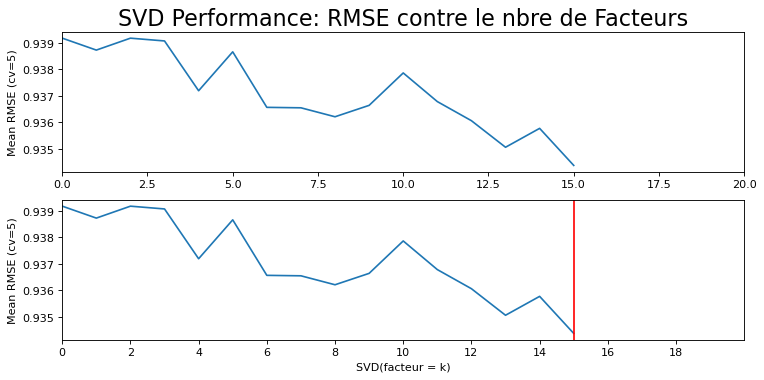

In [12]:
plot_rmse(rmse_svd,"SVD")

### Questions: 

the different parameters of the SVD: https://surprise.readthedocs.io/en/stable/matrix_factorization.html#matrix-factorization-based-algorithms
also: https://surprise.readthedocs.io/en/stable/basic_algorithms.html#surprise.prediction_algorithms.baseline_only.BaselineOnly

1. Using GridSearchCV show the best combination of parameters for the baselineonly version
2. Using GridSearchCV, display the best combination of parameters for the biased version
3. Same question for the unbiased version
4. redo the same work (i.e., 1 and 2 and 3) using RandomizedSearchCV 

In [13]:
# 1- Using GridSearchCV show the best combination of parameters for the baselineonly version 

from surprise import BaselineOnly
from surprise.model_selection import GridSearchCV

# Define the parameter grid

param_grid = {'bsl_options': {'method': ['sgd','als'],
                              'n_epochs': [5, 10, 15],
                              'reg_u': [10, 12, 15],
                              'reg_i': [3, 5, 8]}}
  


algo = BaselineOnly()

gs = GridSearchCV(BaselineOnly, param_grid, measures=['rmse'], cv=5)
gs.fit(data)


print(gs.best_score['rmse'])


print(gs.best_params['rmse'])

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimati

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
0.9408584683479795
{'bsl_options': {'method': 'als', 'n_epochs': 15, 'reg_u': 10, 'reg_i': 3}}


In [14]:
# 2- Using GridSearchCV, display the best combination of parameters for the biased version

from surprise import SVD

# Define the parameter grid
param_grid = {'n_factors': [50, 100, 200],
              'n_epochs': [5, 10, 15],
              'lr_all': [0.002, 0.005, 0.01],
              'reg_all': [0.02, 0.1, 0.2]
             }

# SVD with biased=True
algo = SVD(biased=True)

# Perform grid search
gs = GridSearchCV(algo_class=SVD, param_grid=param_grid, measures=['rmse'], cv=5, refit=True)
gs.fit(data)

# Get the best RMSE score
print(gs.best_score['rmse'])

# Get the best parameters
print(gs.best_params['rmse'])


0.9252647891248179
{'n_factors': 200, 'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.1}


In [15]:
# 3-  Same question for the unbiased version
param_grid = {'n_factors': [50, 100, 200],
              'n_epochs': [5, 10, 15],
              'lr_all': [0.002, 0.005, 0.01],
              'reg_all': [0.02, 0.1, 0.2]
             }

# SVD with biased False
algo = SVD(biased=False)

gs = GridSearchCV(algo_class=SVD, param_grid=param_grid, measures=['rmse'], cv=5, refit=True)
gs.fit(data)

print('Best RMSE score:', gs.best_score['rmse'])
print('Best parameters:', gs.best_params['rmse'])

Best RMSE score: 0.9240054645827867
Best parameters: {'n_factors': 200, 'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.1}


In [16]:
# 4-  redo the same work (i.e., 1 and 2 and 3) using RandomizedSearchCV

In [17]:
# 4-1
from surprise.model_selection import RandomizedSearchCV



param = {'bsl_options': {'method': ['sgd','als'],
                              'n_epochs': [5, 10, 15],
                              'reg_u': [10, 12, 15],
                              'reg_i': [3, 5, 8]}}
  


algo = BaselineOnly()
                  

rs = RandomizedSearchCV(algo_class=BaselineOnly, param_distributions=param , measures=['rmse'], cv=5, refit=True)
rs.fit(data)

print('Best RMSE score:', rs.best_score['rmse'])
print('Best parameters:', rs.best_params['rmse'])

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimati

In [18]:
# 4-2

param = {'n_factors': [50, 100, 200],
              'n_epochs': [5, 10, 15],
              'lr_all': [0.002, 0.005, 0.01],
              'reg_all': [0.02, 0.1, 0.2]
             }

# SVD with biased=True
algo = SVD(biased=True)


rs = RandomizedSearchCV(algo_class= SVD, param_distributions = param , measures=['rmse'], cv=5, refit=True)
rs.fit(data)


# Get the best RMSE score
print(rs.best_score['rmse'])

# Get the best parameters
print(rs.best_params['rmse'])

0.9246041060920038
{'n_factors': 200, 'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.1}


In [19]:
# 4-3 Same question for the unbiased version
param = {'n_factors': [50, 100, 200],
              'n_epochs': [5, 10, 15],
              'lr_all': [0.002, 0.005, 0.01],
              'reg_all': [0.02, 0.1, 0.2]
             }

# SVD with biased False
algo = SVD(biased=False)

rs = RandomizedSearchCV(algo_class= SVD, param_distributions = param , measures=['rmse'], cv=5, refit=True)
rs.fit(data)

print('Best RMSE score:', gs.best_score['rmse'])
print('Best parameters:', gs.best_params['rmse'])

Best RMSE score: 0.9240054645827867
Best parameters: {'n_factors': 200, 'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.1}
